In [5]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as ny
import seaborn as sns



from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('jamb_exam_results.csv')

# Analysis of Students Performance in 2024 JAMB
This dataset was obtained from a Kaggle dataset of the same name

## Overview
This is a data set that contains information from the 2024 JAMB(JJoint Admissions and Matriculation Boar) test which is an evaluation performed in Nigeria for incoming undergraduate students



For this analysis, we will utilize visualization graphs, linear regression, logistic regression, heatmaps and visualization tools to inspect how certain factors affect the participants' success.

In [8]:
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [9]:
df.isnull().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

### Starting with data visulaization

For this section, we will display different graphs for the frequency of certain values in certain columns.\
Mean values for certain values will also be compared with the JAMB score obtained by the participants

In [356]:
Parent_InvolvementFreq = df['Parent_Involvement'].value_counts()
Parent_InvolvementFreq

Parent_Involvement
Medium    2012
Low       1877
High      1111
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

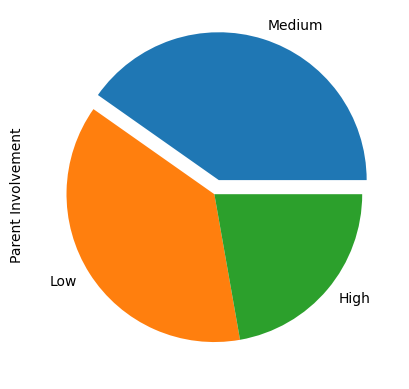

In [385]:
Parent_InvolvementFreq.plot(kind = 'pie', ylabel = "Parent Involvement", explode = [0.1 , 0 , 0])
pt.show



<function matplotlib.pyplot.show(close=None, block=None)>

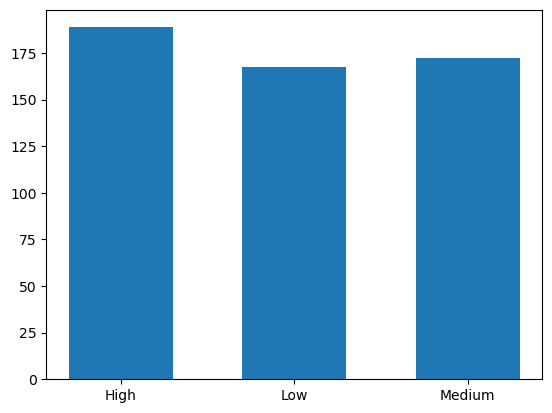

In [393]:
parentinvolve_avgdf = df[['Parent_Involvement','JAMB_Score']].copy()

parentinvolve_avgdf = parentinvolve_avgdf.groupby(parentinvolve_avgdf['Parent_Involvement'], as_index = False).mean()

pt.bar(parentinvolve_avgdf['Parent_Involvement'], parentinvolve_avgdf['JAMB_Score'], width = 0.6)
pt.show

(array([967., 946., 949., 832., 681., 427., 123.,  53.,  10.,  12.]),
 array([100. , 126.7, 153.4, 180.1, 206.8, 233.5, 260.2, 286.9, 313.6,
        340.3, 367. ]),
 <BarContainer object of 10 artists>)

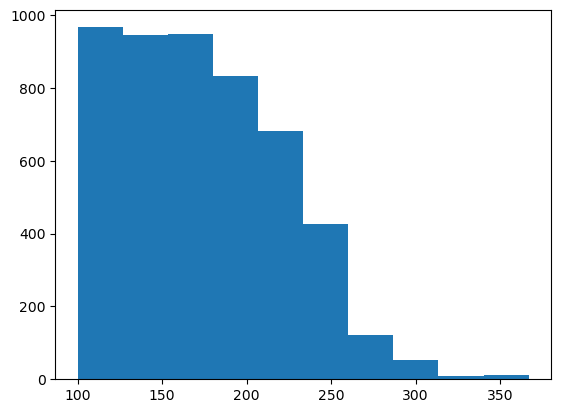

In [425]:
pt.hist(df['JAMB_Score'], bins = 10)

<function matplotlib.pyplot.show(close=None, block=None)>

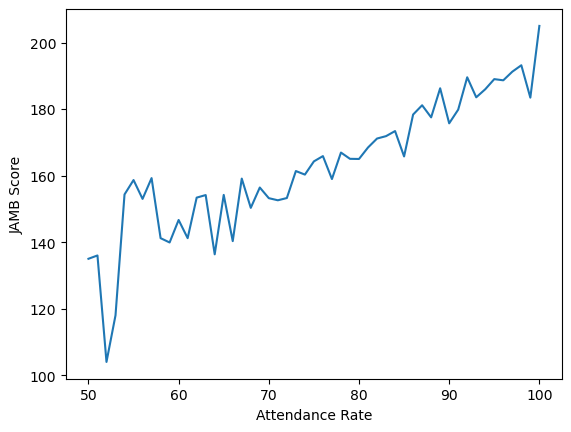

In [379]:
attendance_avgdf = df[['Attendance_Rate','JAMB_Score']].copy()

attendance_avgdf = attendance_avgdf.groupby(attendance_avgdf['Attendance_Rate'], as_index = False).mean()
pt.plot(attendance_avgdf['Attendance_Rate'], attendance_avgdf['JAMB_Score'])
pt.ylabel("JAMB Score")
pt.xlabel("Attendance Rate")
pt.show

### Let us create a Logistic Regression model using all of the values aside from the parent_education_level column 

First we must turn the Jamb_score into a y value that is only 0 or 1, for this we create a new column to represent a 'strong' score which we'll take as above 225 for this analysis

In [12]:
df['Strong_Score'] = ny.where(df['JAMB_Score'] > 200, 1, 0)

In [13]:
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed,Strong_Score
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2,0
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2,0
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2,0
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1,0
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3,1
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1,0


In [14]:
copydf = df.drop(columns = ['JAMB_Score', 'Parent_Education_Level', 'Student_ID'])

Ensuring all columns are numeric values 

In [16]:
copydf['School_Type'] = copydf['School_Type'].astype('category')
copydf['School_Type'] = copydf['School_Type'].cat.codes

copydf['School_Location'] = copydf['School_Location'].astype('category')
copydf['School_Location'] = copydf['School_Location'].cat.codes


copydf['Extra_Tutorials'] = copydf['Extra_Tutorials'].astype('category')
copydf['Extra_Tutorials'] = copydf['Extra_Tutorials'].cat.codes


copydf['Access_To_Learning_Materials'] = copydf['Access_To_Learning_Materials'].astype('category')
copydf['Access_To_Learning_Materials'] = copydf['Access_To_Learning_Materials'].cat.codes

copydf['Parent_Involvement'] = copydf['Parent_Involvement'].astype('category')
copydf['Parent_Involvement'] = copydf['Parent_Involvement'].cat.codes

copydf['IT_Knowledge'] = copydf['IT_Knowledge'].astype('category')
copydf['IT_Knowledge'] = copydf['IT_Knowledge'].cat.codes

copydf['Gender'] = copydf['Gender'].astype('category')
copydf['Gender'] = copydf['Gender'].cat.codes

copydf['Socioeconomic_Status'] = copydf['Socioeconomic_Status'].astype('category')
copydf['Socioeconomic_Status'] = copydf['Socioeconomic_Status'].cat.codes




In [17]:
x = copydf.drop(columns = ['Strong_Score'])


In [18]:
y = copydf['Strong_Score']

In [19]:
x

,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Age,Gender,Socioeconomic_Status,Assignments_Completed
0,22,78,4,12.4,1,1,1,1,0,2,17,1,1,2
1,14,88,4,2.7,1,0,0,1,0,0,15,1,0,1
2,29,87,2,9.6,1,0,1,1,0,2,20,0,0,2
3,29,99,2,2.6,1,1,0,1,2,0,22,0,2,1
4,12,98,3,8.8,1,1,0,1,2,2,22,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20,74,2,10.6,1,1,1,0,1,1,16,1,2,2
4996,0,80,2,20.0,1,0,0,1,2,2,22,1,1,1
4997,17,89,3,11.3,1,1,0,0,1,0,18,1,2,3
4998,15,96,2,15.9,1,0,0,0,1,2,18,1,2,1


In [20]:
y

0       0
1       1
2       0
3       1
4       0
       ..
4995    0
4996    0
4997    1
4998    0
4999    1
Name: Strong_Score, Length: 5000, dtype: int32

Creating the test and train split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state = 9)

Scaling the values so one variable doesn't over power the others

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
x_train_scaled

array([[-0.59215089,  0.71783279, -0.55142327, ...,  1.02511529,
         1.08117534, -0.81662632],
       [ 2.12413759, -0.3391093 ,  0.46446337, ..., -0.97550003,
        -1.53414963,  0.19006293],
       [-0.27873299,  0.18936175,  0.46446337, ..., -0.97550003,
        -0.22648714,  1.19675217],
       ...,
       [ 0.34810282, -1.81882824,  0.46446337, ...,  1.02511529,
        -1.53414963, -0.81662632],
       [ 0.24363018,  0.61213858, -0.55142327, ...,  1.02511529,
        -0.22648714,  1.19675217],
       [-1.74134986,  0.08366754, -1.5673099 , ..., -0.97550003,
         1.08117534, -0.81662632]])

In [26]:
log_reg = LogisticRegression(random_state = 0).fit(x_train_scaled, y_train)

In [27]:
log_reg.predict(x_train_scaled)

array([0, 1, 0, ..., 0, 0, 0])

Now that we have our predicted values lets see the accuracy of the trained model to the actual values

In [29]:
log_reg.score(x_train_scaled, y_train)


0.7648

In [30]:
log_reg.score(x_test_scaled,y_test)

0.7692

So the logistic regression model has a pretty good acurracy, lets see if some values can be adjusted to improve it

In [32]:
log_reg1 = LogisticRegression(random_state = 0, C = 0.04, fit_intercept = True).fit(x_train_scaled,y_train)

In [33]:
log_reg1.score(x_test_scaled,y_test)

0.77

In [34]:
log_reg2 = LogisticRegression(random_state = 0, C = 0.04, fit_intercept = True).fit(x_train_scaled,y_train)
log_reg2.score(x_train_scaled,y_train)

0.7668

### Heatmap Analysis

Now that we've done a logistic regression lets use a heatmap to determine what facters affect the Strong_Score value the most

In [39]:
copyheatdf = df.drop(columns = ['Parent_Education_Level', 'Student_ID', 'Strong_Score'])
copyheatdf['School_Type'] = copyheatdf['School_Type'].astype('category')
copyheatdf['School_Type'] = copyheatdf['School_Type'].cat.codes

copyheatdf['School_Location'] = copyheatdf['School_Location'].astype('category')
copyheatdf['School_Location'] = copyheatdf['School_Location'].cat.codes


copyheatdf['Extra_Tutorials'] = copyheatdf['Extra_Tutorials'].astype('category')
copyheatdf['Extra_Tutorials'] = copyheatdf['Extra_Tutorials'].cat.codes


copyheatdf['Access_To_Learning_Materials'] = copyheatdf['Access_To_Learning_Materials'].astype('category')
copyheatdf['Access_To_Learning_Materials'] = copyheatdf['Access_To_Learning_Materials'].cat.codes

copyheatdf['Parent_Involvement'] = copyheatdf['Parent_Involvement'].astype('category')
copyheatdf['Parent_Involvement'] = copyheatdf['Parent_Involvement'].cat.codes

copyheatdf['IT_Knowledge'] = copyheatdf['IT_Knowledge'].astype('category')
copyheatdf['IT_Knowledge'] = copyheatdf['IT_Knowledge'].cat.codes

copyheatdf['Gender'] = copyheatdf['Gender'].astype('category')
copyheatdf['Gender'] = copyheatdf['Gender'].cat.codes

copyheatdf['Socioeconomic_Status'] = copyheatdf['Socioeconomic_Status'].astype('category')
copyheatdf['Socioeconomic_Status'] = copyheatdf['Socioeconomic_Status'].cat.codes








heat_df = copyheatdf
heat_df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Age,Gender,Socioeconomic_Status,Assignments_Completed
0,192,22,78,4,12.4,1,1,1,1,0,2,17,1,1,2
1,207,14,88,4,2.7,1,0,0,1,0,0,15,1,0,1
2,182,29,87,2,9.6,1,0,1,1,0,2,20,0,0,2
3,210,29,99,2,2.6,1,1,0,1,2,0,22,0,2,1
4,199,12,98,3,8.8,1,1,0,1,2,2,22,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,1,1,1,0,1,1,16,1,2,2
4996,179,0,80,2,20.0,1,0,0,1,2,2,22,1,1,1
4997,261,17,89,3,11.3,1,1,0,0,1,0,18,1,2,3
4998,183,15,96,2,15.9,1,0,0,0,1,2,18,1,2,1


In [40]:
correlation_matrix = heat_df.corr()
correlation_matrix

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Age,Gender,Socioeconomic_Status,Assignments_Completed
JAMB_Score,1.000000,0.420061,0.280953,0.299505,-0.094142,-0.087298,0.027997,0.067432,0.047242,-0.109038,-0.097563,-0.028432,-0.014638,-0.099005,0.278079
Study_Hours_Per_Week,0.420061,1.000000,0.129738,0.120297,-0.022266,-0.047836,0.011476,0.020293,0.036097,-0.030800,-0.052477,-0.024121,-0.013344,-0.027904,0.618464
Attendance_Rate,0.280953,0.129738,1.000000,0.080537,-0.057385,-0.057113,0.016615,0.014608,0.003990,-0.042335,-0.039671,0.008382,0.004515,-0.024568,0.087490
Teacher_Quality,0.299505,0.120297,0.080537,1.000000,0.005902,-0.032412,0.016118,0.033117,0.017425,-0.063241,-0.031968,-0.022594,0.007364,-0.015594,0.068621
Distance_To_School,-0.094142,-0.022266,-0.057385,0.005902,1.000000,0.005747,0.010688,0.016276,-0.019003,-0.001382,0.007782,0.001874,0.005305,-0.008371,-0.017597
School_Type,-0.087298,-0.047836,-0.057113,-0.032412,0.005747,1.000000,-0.008354,-0.013474,0.003459,0.017310,0.021755,-0.002012,0.022922,0.026557,-0.020490
School_Location,0.027997,0.011476,0.016615,0.016118,0.010688,-0.008354,1.000000,0.006270,-0.000440,0.008557,-0.005821,-0.008488,-0.022601,0.005509,-0.015151
Extra_Tutorials,0.067432,0.020293,0.014608,0.033117,0.016276,-0.013474,0.006270,1.000000,-0.037463,0.007659,-0.011114,0.017970,0.006286,-0.030421,0.001896
Access_To_Learning_Materials,0.047242,0.036097,0.003990,0.017425,-0.019003,0.003459,-0.000440,-0.037463,1.000000,0.000028,-0.015447,-0.004737,-0.018640,-0.014108,0.022629
Parent_Involvement,-0.109038,-0.030800,-0.042335,-0.063241,-0.001382,0.017310,0.008557,0.007659,0.000028,1.000000,0.022377,0.021271,0.022825,0.012139,-0.013348


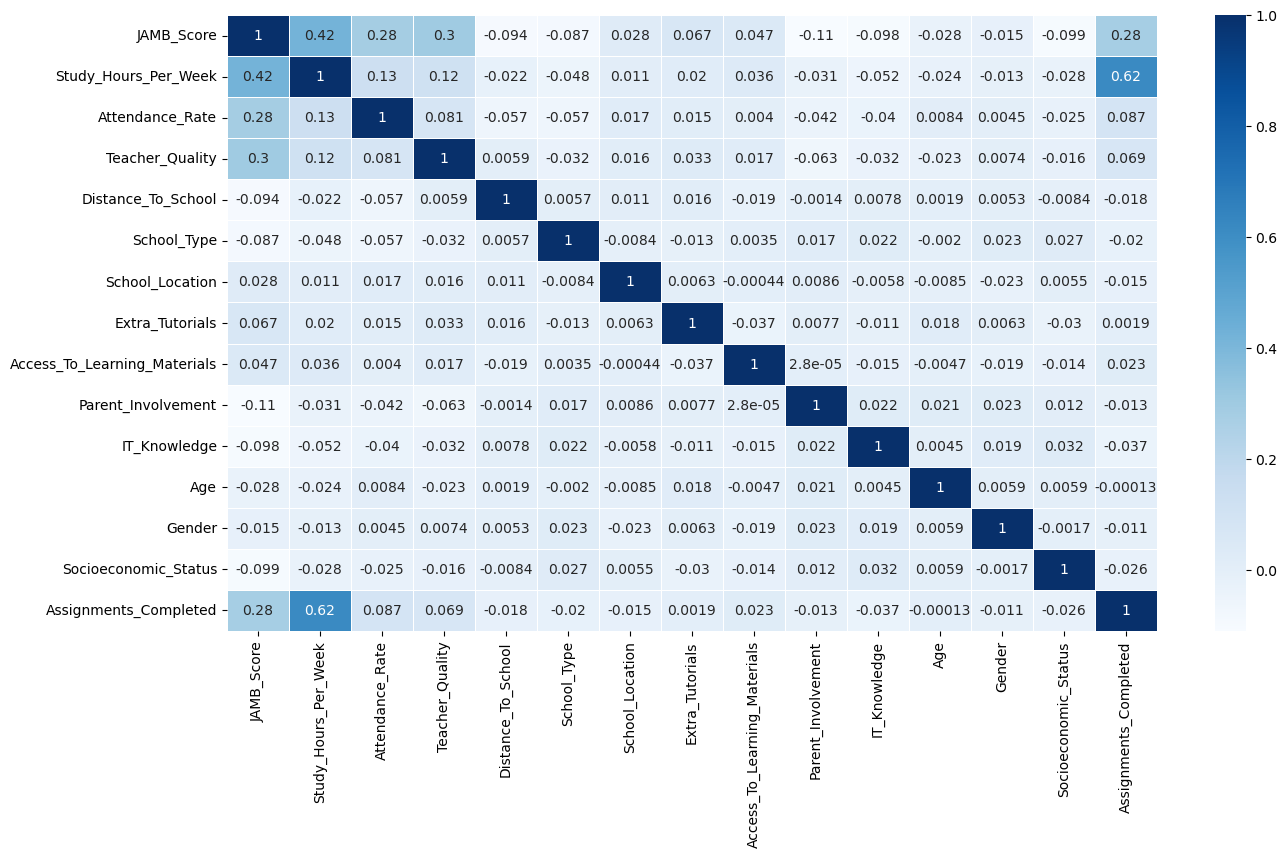

In [41]:
pt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, annot= True, cmap= "Blues", linewidths = 0.5)
pt.show()

### Heatmap comments

From this heatmap, out of all of the correlations on the chart (Study_Hours_Per_week) has the strongest correlation followed by (Attendance_Rate, Teacher_Quality and Assignments_Completed) on the JAMB_Score, so we can analyze these values with Linear Regression

Let's do a single linear regression with Study_Hours_Per_Week and then do multiple linear regression with the rest of the values

### Linear Regression

In [107]:
xstud = df['Study_Hours_Per_Week']
ystud = df['JAMB_Score']

xs_train, xs_test, ys_train, ys_test = train_test_split(xstud, ystud, test_size = 0.4, random_state = 0)

In [109]:
lr = LinearRegression()

In [319]:
#For Turning the columns into 2d arrays so we can use linear regression
xs_train = ny.array(xs_train).reshape(-1,1)
xs_test = ny.array(xs_test).reshape(-1,1)
ys_train = ny.array(ys_train).reshape(-1,1)
ys_test = ny.array(ys_test).reshape(-1,1)

lr.fit(xs_train, ys_train)

LinearRegression()

In [113]:
c = lr.intercept_
m = lr.coef_

In [115]:
c

133.97339148280037

In [117]:
m

array([2.09207871])

In [221]:
ys_pred_train = lr.predict(xs_train)
ys_pred_test = lr.predict(xs_test)

Text(0, 0.5, 'JAMB Score')

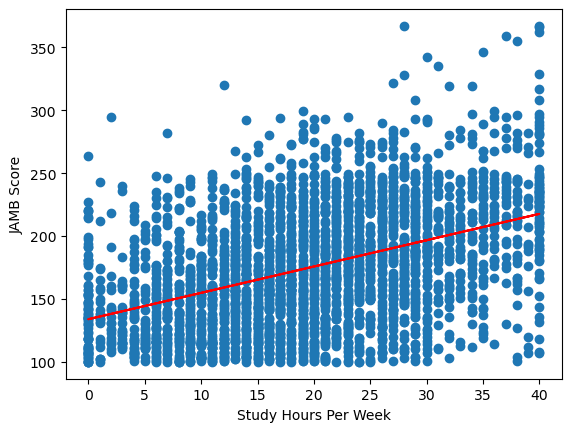

In [313]:
pt.scatter(xs_train,ys_train)
pt.plot(xs_train,ys_pred_train, color = 'red')
pt.xlabel('Study Hours Per Week')
pt.ylabel('JAMB Score')


In [325]:
l1_score = lr.score(xs_train,ys_train)

In [327]:
l1_score

0.18432344857180383

Text(0, 0.5, 'JAMB Score')

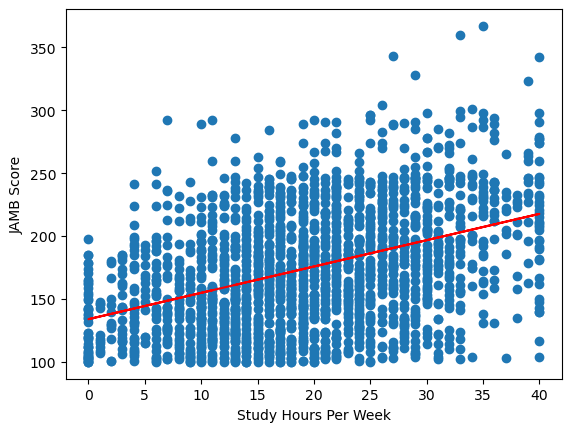

In [329]:
pt.scatter(xs_test,ys_test)
pt.plot(xs_test,ys_pred_test, color = 'red')
pt.xlabel('Study Hours Per Week')
pt.ylabel('JAMB Score')


In [305]:
l2_score = lr.score(xs_test,ys_test)
l2_score

0.1630364823678846

This linear model seems to be very poor from the graph linear regression alone, so lets analyze the mean score for each increment of Study Hours

In [185]:

study_avgdf = df[['Study_Hours_Per_Week','JAMB_Score']].copy()

study_avgdf = study_avgdf.groupby(study_avgdf['Study_Hours_Per_Week'], as_index = False).mean()

In [187]:
study_avgdf

,Study_Hours_Per_Week,JAMB_Score
0,0,140.142857
1,1,137.205882
2,2,143.176471
3,3,142.870370
4,4,146.865854
5,5,144.784314
6,6,150.163265
7,7,154.305263
8,8,150.259615
9,9,146.807692


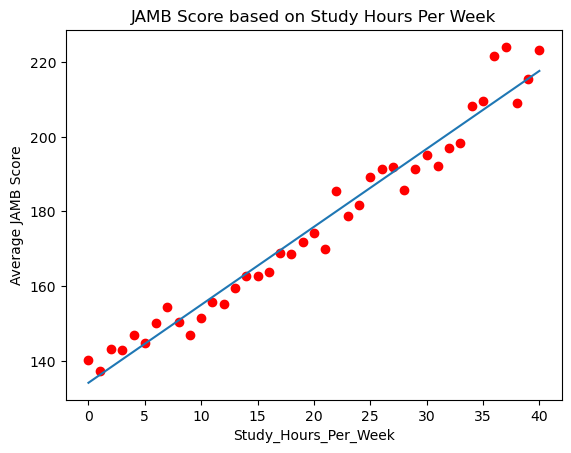

In [205]:
a, b = ny.polyfit(study_avgdf['Study_Hours_Per_Week'], study_avgdf['JAMB_Score'], 1)


xs = study_avgdf['Study_Hours_Per_Week']
ys = study_avgdf['JAMB_Score']

pt.scatter(xs, ys, c = "red")
pt.plot(xs, a*xs+b)
pt.xlabel("Study_Hours_Per_Week")
pt.ylabel("Average JAMB Score")
pt.title("JAMB Score based on Study Hours Per Week")
pt.show()

From analyzing the mean values of the graph we have a positive line of best fit, showing that with more study hours per week, there is an increase in the average score. However this connection cannot be made alone with the linear regression of the values, because of the weak r2 fit, so lets analyze a multiple linear regression graph. 

In [269]:
# Using the values from the heatmap that had an impact on the JAMB_Score value  (Attendance_Rate, Teacher_Quality and Assignments_Completed, Study_Hours_Per_Week)
xmul = df[['Attendance_Rate','Teacher_Quality', 'Assignments_Completed', 'Study_Hours_Per_Week']]

#Since we have categorical values *Teacher_Quality* We can use the dummy variable method
ymul = df[['JAMB_Score']]
xmul = pd.get_dummies(data=xmul, drop_first=True)

xmul_train, xmul_test, ymul_train, ymul_test = train_test_split(xmul, ymul, test_size = 0.4, random_state = 0)

Now we can do our multiple linear regression model

In [272]:
regml = LinearRegression()
regml.fit(xmul_train, ymul_train)

LinearRegression()

In [333]:
ymul_pred_train = regml.predict(xmul_train)

Comparing both y values

Text(0, 0.5, 'Predicted  Values')

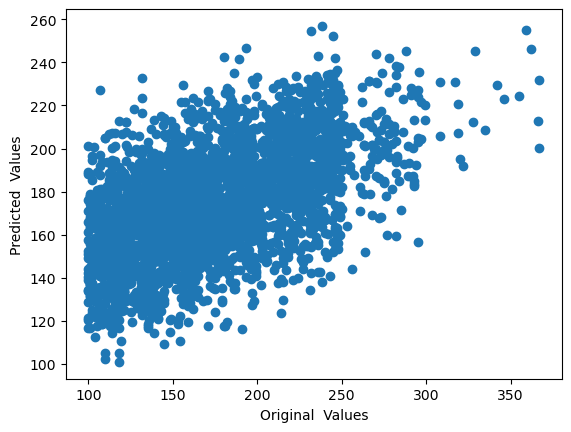

In [336]:
pt.scatter(ymul_train,ymul_pred_train)

pt.xlabel('Original  Values')
pt.ylabel('Predicted  Values')

In [345]:
regmlscore = regml.score(xmul_train,ymul_train)
regmlscore

0.29600415467702945

Comparing each Individual X Value

Text(0, 0.5, 'Predicted y Values')

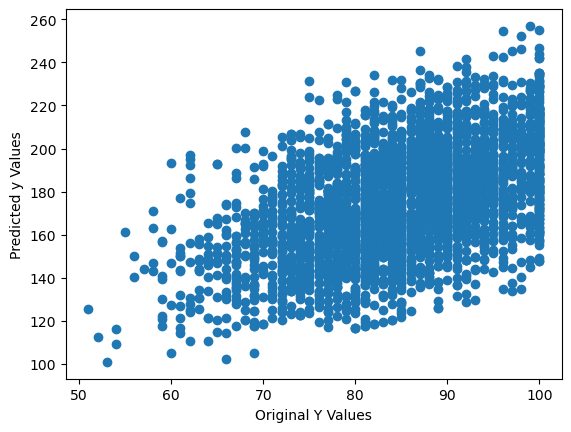

In [285]:
pt.scatter(xmul_train['Attendance_Rate'],yml_pred_train)

pt.xlabel('Original Y Values')
pt.ylabel('Predicted y Values')

In [309]:
r2Attend = r2_score(xmul_train['Attendance_Rate'], ymul_train)
r2Attend

-114.90331389926237

Text(0, 0.5, 'Predicted y Values')

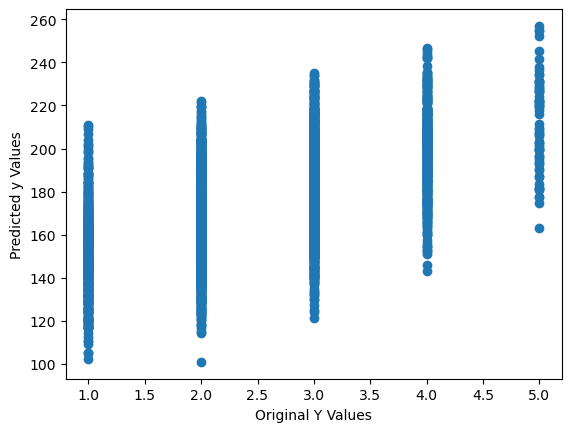

In [287]:
pt.scatter(xmul_train['Teacher_Quality'],yml_pred_train)

pt.xlabel('Original Y Values')
pt.ylabel('Predicted y Values')

Text(0, 0.5, 'Predicted y Values')

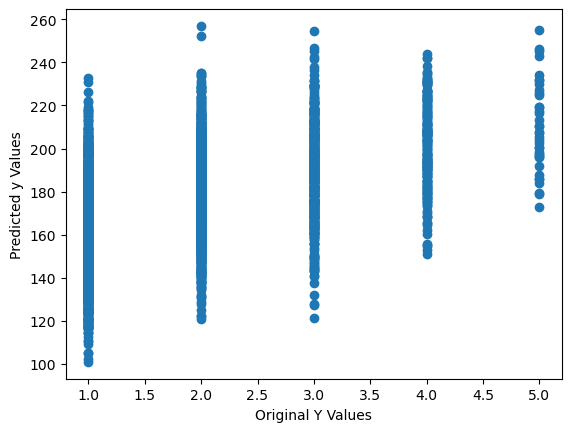

In [291]:
pt.scatter(xmul_train['Assignments_Completed'],yml_pred_train)

pt.xlabel('Original Y Values')
pt.ylabel('Predicted y Values')

Text(0, 0.5, 'Predicted y Values')

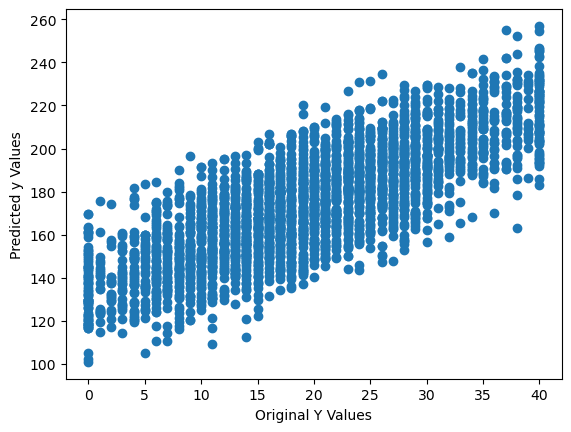

In [289]:
pt.scatter(xmul_train['Study_Hours_Per_Week'],yml_pred_train)

pt.xlabel('Original Y Values')
pt.ylabel('Predicted y Values')

## Final Remarks

From this analysis, we can see that, the values all together are more relevant than on their own when determining the JAMB score that the participant obtained

From the mean value graph with the independent variable as study_hours_per_week, we can see that it has a positive effect on the mean score. This shows that there is some correlation, however the linear regression models show us that the r2 score isn't good. This leads to the correlation being weak overall, however with the logistic regression model when all of the values are used to analyze participants achieving a good score we get a stronger r2 score. Along with the analysis of the individual values, we can see that the participant's scores require an analysis of all values in relation to each other to accurately predict the score of a participant.

